In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Wholesale+Customers+Data.csv')
data.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
data.dtypes

Buyer/Spender        int64
Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicatessen         int64
dtype: object

In [5]:
print(data.isnull().sum())

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64


In [6]:
data_numeric = data.drop(['Buyer/Spender'],axis=1,inplace=True)
data_numeric

In [7]:
data['Total_Annual_Spending'] = data['Fresh'] + data['Milk'] + data['Grocery'] + data['Frozen'] + data['Detergents_Paper'] + data['Delicatessen']
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Annual_Spending
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [8]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicatessen', 'Total_Annual_Spending'],
      dtype='object')

In [9]:
row, col = data.shape
print('Total Number of Rows:', row, '\n''Total Number of columns:',col)

Total Number of Rows: 440 
Total Number of columns: 9


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Channel                440 non-null    object
 1   Region                 440 non-null    object
 2   Fresh                  440 non-null    int64 
 3   Milk                   440 non-null    int64 
 4   Grocery                440 non-null    int64 
 5   Frozen                 440 non-null    int64 
 6   Detergents_Paper       440 non-null    int64 
 7   Delicatessen           440 non-null    int64 
 8   Total_Annual_Spending  440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


**Descriptive Statistics**

In [12]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
Total_Annual_Spending,440.0,NaN,NaN,NaN,33226.136364,26356.30173,904.0,17448.75,27492.0,41307.5,199891.0


In [13]:
print(data.groupby('Region')['Total_Annual_Spending'].sum(),'\n')

print(data.groupby('Channel')['Total_Annual_Spending'].sum())

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total_Annual_Spending, dtype: int64 

Channel
Hotel     7999569
Retail    6619931
Name: Total_Annual_Spending, dtype: int64


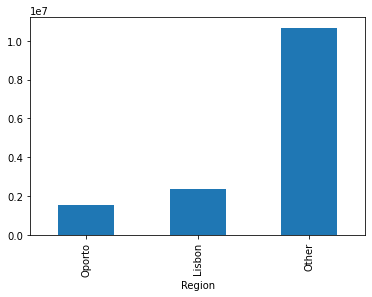

In [14]:
# plt.figure(figsize=(20,8))
data.groupby('Region').sum()['Total_Annual_Spending'].sort_values(ascending = True).plot(kind = 'bar');

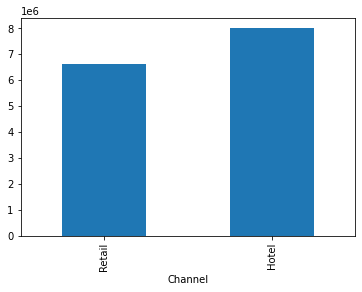

In [15]:
data.groupby('Channel').sum()['Total_Annual_Spending'].sort_values(ascending = True).plot(kind = 'bar');

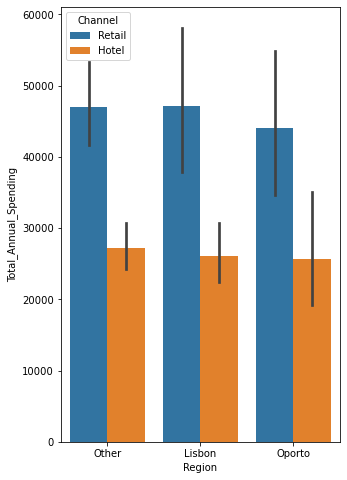

In [16]:
plt.figure(figsize=(5,8))
sns.barplot(x=data['Region'], y=data['Total_Annual_Spending'], hue='Channel', data =data);

In [17]:
df = data.groupby(['Region','Channel']).agg({'Total_Annual_Spending' : 'sum'})
df

Total_Annual_Spending
Region Channel                       
Lisbon Hotel                  1538342
       Retail                  848471
Oporto Hotel                   719150
       Retail                  835938
Other  Hotel                  5742077
       Retail                 4935522

In [18]:
data.groupby(['Region','Channel']).sum().reset_index()

,Region,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Annual_Spending
0,Lisbon,Hotel,761233,228342,237542,184512,56081,70632,1538342
1,Lisbon,Retail,93600,194112,332495,46514,148055,33695,848471
2,Oporto,Hotel,326215,64519,123074,160861,13516,30965,719150
3,Oporto,Retail,138506,174625,310200,29271,159795,23541,835938
4,Other,Hotel,2928269,735753,820101,771606,165990,320358,5742077
5,Other,Retail,1032308,1153006,1675150,158886,724420,191752,4935522


#### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [19]:
data.drop(['Total_Annual_Spending'],axis=1,inplace=True)

In [20]:
sum_Region = data.groupby('Region').sum()
sum_Region.round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


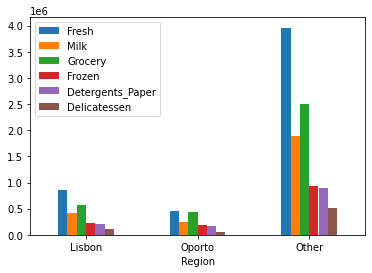

In [21]:
sum_Region.plot.bar(rot=0);

In [22]:
sum_Channel = data.groupby('Channel').sum()
sum_Channel.round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


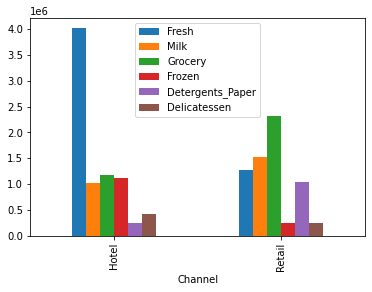

In [23]:
sum_Channel.plot.bar();

#### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

**Standard Deviations**

In [24]:
data.std()

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

**IQR**

In [25]:
Q1 =data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicatessen         1412.00
dtype: float64


#### 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

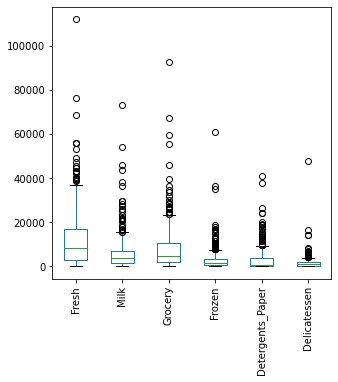

In [26]:
plt.figure (figsize=(5,5))
data.boxplot(fontsize=None,
    rot=90,
    grid=False);

#### Check outlier by IQR

In [27]:
data_outlier = (data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))
data_outlier.head()

,Channel,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False


#### Individually Check outlier of each variables by boxplot

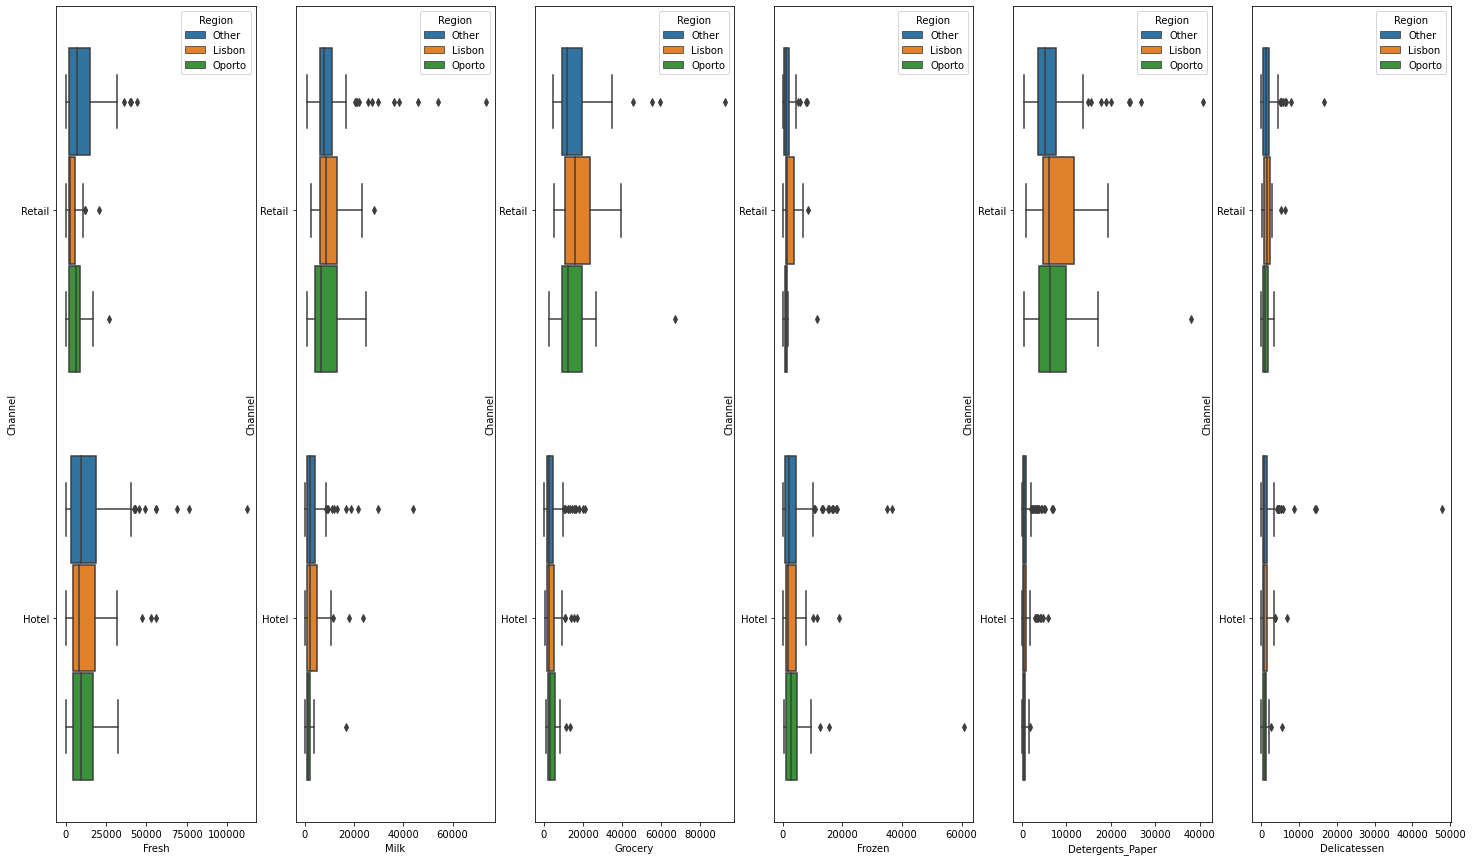

In [28]:
plt.figure(figsize=(25,15))
plt.subplot(1,6,1)
sns.boxplot(data['Fresh'],data['Channel'], hue = data['Region']);
plt.xlabel('Fresh');
plt.subplot(1,6,2)
sns.boxplot(data['Milk'],data['Channel'], hue = data['Region']);
plt.xlabel('Milk');
plt.subplot(1,6,3)
sns.boxplot(data['Grocery'],data['Channel'], hue = data['Region']);
plt.xlabel('Grocery');
plt.subplot(1,6,4)
sns.boxplot(data['Frozen'],data['Channel'], hue = data['Region']);
plt.xlabel('Frozen');
plt.subplot(1,6,5)
sns.boxplot(data['Detergents_Paper'],data['Channel'], hue = data['Region']);
plt.xlabel('Detergents_Paper');
plt.subplot(1,6,6)
sns.boxplot(data['Delicatessen'],data['Channel'], hue = data['Region']);
plt.xlabel('Delicatessen');

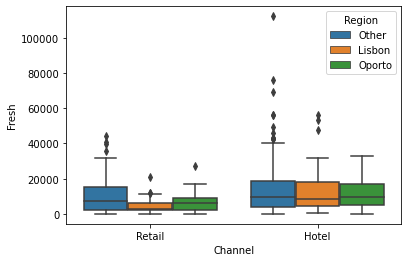

In [29]:
# plt.figure(figsize=(10,6))
sns.boxplot(data['Channel'],data['Fresh'], hue = data['Region']);

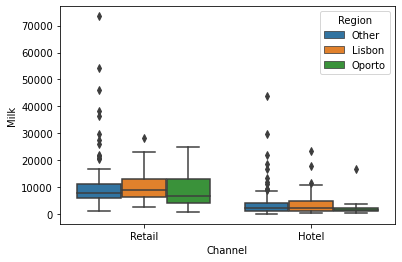

In [30]:
# plt.figure(figsize=(10,6))
sns.boxplot(data['Channel'],data['Milk'], hue = data['Region']);

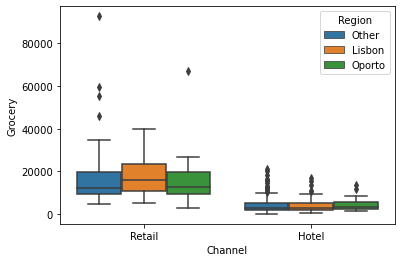

In [31]:
# plt.figure(figsize=(10,6))
sns.boxplot(data['Channel'],data['Grocery'], hue = data['Region']);

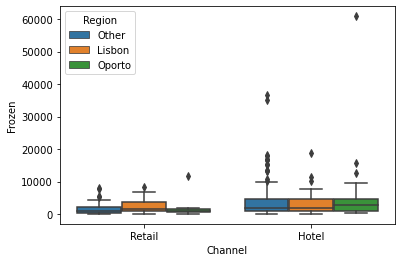

In [32]:
# plt.figure(figsize=(10,6))
sns.boxplot(data['Channel'],data['Frozen'], hue = data['Region']);

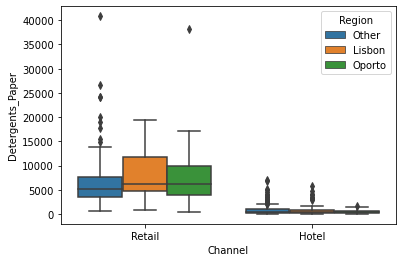

In [33]:
# plt.figure(figsize=(10,6))
sns.boxplot(data['Channel'],data['Detergents_Paper'], hue = data['Region']);

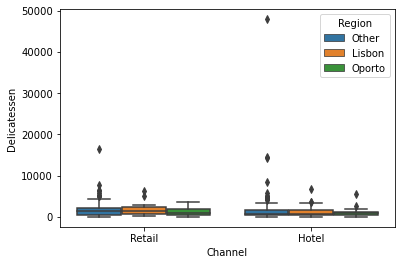

In [34]:
# plt.figure(figsize=(10,6))
sns.boxplot(data['Channel'],data['Delicatessen'], hue = data['Region']);

#### 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

Based on the analysis done so far it is evident that there are many buyers in other
region so we could improve our retailer base in Lisbon and Oporto region as well
We can find evidence Fresh items are considerably used by many retailers among all the
region. We find that varieties like Frozen, Detergents paper and Delicatessen are not
Popular among the retailers so we can try maximize these products where the demand
Is more. As of now there is only two modes of sales either by Retail or Hotel. Considerin
g the base of the region we can use multiple sale method to reach our customers.